<a href="https://colab.research.google.com/github/Ezequiel-del/Parciales_de_IA_2-2024/blob/main/PrimerParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset para parcilaes /train.csv')


# Verificar la cantidad de valores faltantes por columna
faltantes = df.isnull().sum()

# Mostrar las columnas que tienen valores faltantes
print(faltantes)

df.info()

print(df.info)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64

In [15]:
# Crear la columna 'Has5G' basada en la columna 'price_range'
df['Has5G'] = df['price_range'].apply(lambda x: True if x in [2, 3] else False)

# Crear la columna 'OperatingSystem' basada en la columna 'price_range'
def assign_os(price_range):
    if price_range == 3:  # Costo muy alto - iOS
        return 'iOS'
    elif price_range == 2:  # Costo alto - mezcla de iOS y Android
        return np.random.choice(['iOS', 'Android'], p=[0.7, 0.3])  # 70% iOS, 30% Android
    else:  # Costo bajo y medio - Android o Windows
        return np.random.choice(['Android', 'Windows'])

df['OperatingSystem'] = df['price_range'].apply(assign_os)

# Mostrar las primeras filas del dataset modificado
print(df.head())

# Guardar el dataset modificado
df.to_csv('train_modified.csv', index=False)

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9     7         19        0   
1        136        3  ...  2631    17     3          7        1   
2        145        5  ...  2603    11     2          9        1   
3        131        6  ...  2769    16     8         11        1   
4        141        2  ...  1411     8     2         15        1   

   touch_screen  wifi  price_range  Has5G  OperatingSystem  
0             0     1            1  False        

In [18]:
# Función para crear variaciones significativas en los datos
def variar_significativamente(fila):
    # Cambiar numéricos con una variación más grande, garantizando que no sean negativos
    fila['ram'] = max(0, fila['ram'] + np.random.randint(-1024, 1024))  # Variación de hasta 1GB
    fila['battery_power'] = max(0, fila['battery_power'] + np.random.randint(-500, 500))  # Variación significativa de la batería
    fila['px_height'] = max(0, fila['px_height'] + np.random.randint(-500, 500))  # Variación en la altura de píxeles
    fila['px_width'] = max(0, fila['px_width'] + np.random.randint(-500, 500))  # Variación en el ancho de píxeles
    fila['int_memory'] = max(0, fila['int_memory'] + np.random.randint(-32, 32))  # Variación en memoria interna

    # Cambiar características categóricas
    fila['Has5G'] = not fila['Has5G']  # Invertir si tiene 5G
    fila['OperatingSystem'] = np.random.choice(['Android', 'iOS', 'Windows'])  # Asignar un nuevo sistema operativo aleatorio

    return fila

# Duplicar todo el dataset aplicando variaciones significativas
duplicados = []

for i in range(len(df)):
    fila_original = df.iloc[i].copy()  # Copiar la fila original
    fila_duplicada = variar_significativamente(fila_original)  # Variar significativamente la fila duplicada
    duplicados.append(fila_duplicada)  # Agregar la fila duplicada a la lista

# Convertir la lista de duplicados a un DataFrame
duplicados_df = pd.DataFrame(duplicados)

# Combinar el dataset original con los duplicados
df_final = pd.concat([df, duplicados_df], ignore_index=True)

# Ver las primeras filas del nuevo dataset con duplicados
print(df_final.head())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9     7         19        0   
1        136        3  ...  2631    17     3          7        1   
2        145        5  ...  2603    11     2          9        1   
3        131        6  ...  2769    16     8         11        1   
4        141        2  ...  1411     8     2         15        1   

   touch_screen  wifi  price_range  Has5G  OperatingSystem  
0             0     1            1  False        

In [21]:
# Obtener el número de filas y columnas
num_filas, num_columnas = df_final.shape
print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")


Número de filas: 4000, Número de columnas: 23


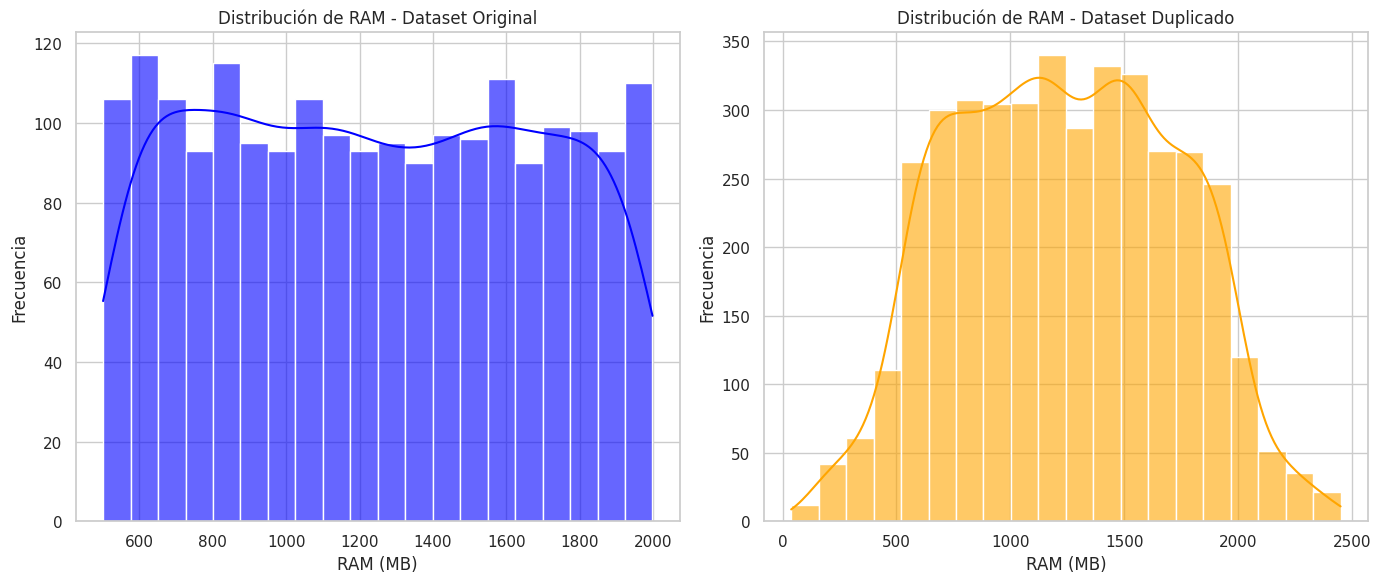

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para el dataset original
sns.histplot(df['battery_power'], bins=20, kde=True, ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title('Distribución de RAM - Dataset Original')
axes[0].set_xlabel('RAM (MB)')
axes[0].set_ylabel('Frecuencia')

# Gráfico para el dataset duplicado
sns.histplot(df_final['battery_power'], bins=20, kde=True, ax=axes[1], color='orange', alpha=0.6)
axes[1].set_title('Distribución de RAM - Dataset Duplicado')
axes[1].set_xlabel('RAM (MB)')
axes[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()
